# WeatherPy
----

#### Note
* Linear Regression plot between Max Temp and Latitude indicates that the maximum temperature increases as we get closer to the equator and decreases as we go away from the equator for both hemispheres
* Linear Regression plot between Humidity and Latitude indicates that the humidity tends to be a little higher near the equators but stays close to constant over the rest of the hemispheres
* Linear Regression plot between Cloudiness and Latitude indicates that there is little to no relationship between the two variables. Cloudiness tends to occur at all levels across all latitudes.
* Linear Regression plot between Wind Speed and Latitude indicates that there is little to no relationship between the two variables. Wind Speed appears at all levels across all latitudes.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
import sys
%matplotlib inline
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

645

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# Set-up the base url and units
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Initialize the lists
city_name=[]
lat=[]
lng=[]
max_temp=[]
clouds=[]
humidity=[]
wind=[]
country=[]
date=[]


# Save the requested parameters frm the API response to a .csv file with UTF-8 encoding
with open(output_data_file, "w", newline='', encoding='utf8') as datafile:
    writer = csv.writer(datafile)
    
    # Write the header of the .csv file
    writer.writerow(["City", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Country", "Date"])
    for city in cities:
        try:
            query_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
            response = requests.get(query_url)         
           
            # Convert into a json
            weather_response = response.json()

            writer.writerow([weather_response['name'], weather_response['coord']['lat'], weather_response['coord']['lon'], weather_response['main']['temp_max'], weather_response['main']['humidity'], weather_response['clouds']['all'], weather_response['wind']['speed'], weather_response['sys']['country'], weather_response['dt']])
            city_name.append(weather_response['name'])
            lat.append(weather_response['coord']['lat']) 
            lng.append(weather_response['coord']['lon'])
            max_temp.append(weather_response['main']['temp_max'])
            clouds.append(weather_response['clouds']['all'])
            humidity.append(weather_response['main']['humidity']) 
            wind.append(weather_response['wind']['speed'])
            country.append(weather_response['sys']['country'])
            date.append(weather_response['dt'])
            print(f"Processing Record {cities.index(city)} | {city}")
        except(KeyError, IndexError):
            print("Missing field/result......skipping.")


Processing Record 0 | develi
Processing Record 1 | ormara
Processing Record 2 | avarua
Processing Record 3 | kautokeino
Processing Record 4 | negombo
Processing Record 5 | namatanai
Processing Record 6 | rikitea
Processing Record 7 | provideniya
Processing Record 8 | shenjiamen
Processing Record 9 | ushuaia
Processing Record 10 | half moon bay
Processing Record 11 | busselton
Processing Record 12 | san patricio
Processing Record 13 | sambava
Processing Record 14 | khatanga
Processing Record 15 | huarmey
Processing Record 16 | longyearbyen
Processing Record 17 | coquimbo
Processing Record 18 | rovaniemi
Processing Record 19 | buin
Missing field/result......skipping.
Processing Record 21 | mataura
Processing Record 22 | yellowknife
Processing Record 23 | hobart
Missing field/result......skipping.
Processing Record 25 | bridlington
Processing Record 26 | george town
Processing Record 27 | kushima
Processing Record 28 | qesarya
Processing Record 29 | mgandu
Processing Record 30 | xining
Pr

Processing Record 249 | twentynine palms
Missing field/result......skipping.
Processing Record 251 | vung tau
Processing Record 252 | moussoro
Missing field/result......skipping.
Processing Record 254 | tchibanga
Processing Record 255 | guadalupe y calvo
Processing Record 256 | strezhevoy
Missing field/result......skipping.
Processing Record 258 | rockland
Processing Record 259 | smolenka
Processing Record 260 | cayenne
Processing Record 261 | pevek
Processing Record 262 | chute-aux-outardes
Processing Record 263 | huaral
Processing Record 264 | torit
Processing Record 265 | codrington
Processing Record 266 | sembakung
Processing Record 267 | tahoua
Processing Record 268 | pemangkat
Processing Record 269 | san cristobal
Processing Record 270 | brigantine
Processing Record 271 | labuhan
Processing Record 272 | gazanjyk
Processing Record 273 | winneba
Processing Record 274 | mendoza
Processing Record 275 | palmer
Processing Record 276 | rafai
Processing Record 277 | barcelos
Processing R

Missing field/result......skipping.
Processing Record 495 | komsomolskiy
Processing Record 496 | campos
Processing Record 497 | atyrau
Processing Record 498 | puerto quijarro
Processing Record 499 | mecca
Processing Record 500 | casa nova
Processing Record 501 | kelheim
Processing Record 502 | makakilo city
Missing field/result......skipping.
Processing Record 504 | cairns
Processing Record 505 | rawson
Processing Record 506 | san felipe
Processing Record 507 | bairnsdale
Processing Record 508 | warkworth
Processing Record 509 | isangel
Processing Record 510 | merrill
Processing Record 511 | harper
Processing Record 512 | cabugao
Processing Record 513 | nalgonda
Processing Record 514 | sao joao da barra
Processing Record 515 | pangnirtung
Processing Record 516 | at-bashi
Processing Record 517 | brokopondo
Processing Record 518 | flin flon
Processing Record 519 | hibbing
Processing Record 520 | nishihara
Processing Record 521 | williamsport
Processing Record 522 | ulaanbaatar
Processing

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Print the length of each column to verify that all of them are populated
print(f"City {len(city_name)}")
print(f"Latitude {len(lat)}")
print(f"Longitude {len(lng)}")
print(f"Max Temp {len(max_temp)}")
print(f"Cloudiness {len(clouds)}")
print(f"Humidity {len(humidity)}")
print(f"Wind Speed {len(wind)}")
print(f"Country {len(country)}")
print(f"Date {len(date)}")

City 594
Latitude 594
Longitude 594
Max Temp 594
Cloudiness 594
Humidity 594
Wind Speed 594
Country 594
Date 594


In [9]:
# Read the .csv file with the weather data from the API
weather_csv_path = "../output_data/cities.csv"
weather_df = pd.read_csv(weather_csv_path)
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Develi,38.39,35.49,60.80,72,0,1.12,TR,1595562801
1,Ormara,25.21,64.64,85.26,78,88,15.59,PK,1595562801
2,Avarua,-21.21,-159.78,73.40,88,6,4.70,CK,1595562712
3,Kautokeino,69.01,23.04,55.31,93,100,9.28,NO,1595562801
4,Negombo,7.21,79.84,77.00,88,75,8.05,LK,1595562801
...,...,...,...,...,...,...,...,...,...
589,Pangai,-19.80,-174.35,78.80,74,75,13.87,TO,1595562865
590,Amboasary,-25.03,46.38,64.40,82,75,16.11,MG,1595562865
591,Jurm,36.86,70.83,79.74,19,0,4.34,AF,1595562865
592,Aklavik,68.22,-135.01,62.60,42,20,12.75,CA,1595562866


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
# Describe the data frame to verify whether Humidity is > 100%
summary_df = weather_df.describe()
summary_df

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,5.940000e+02
mean,20.022391,18.957256,69.271667,70.333333,49.294613,7.596061,1.595563e+09
std,32.964537,88.520659,13.369810,20.805937,38.358859,5.080222,6.217029e+01
min,-54.800000,-175.200000,31.190000,3.000000,0.000000,0.450000,1.595562e+09
25%,-7.357500,-57.642500,60.800000,59.000000,4.000000,3.855000,1.595563e+09
50%,24.520000,24.325000,70.000000,74.000000,51.500000,6.240000,1.595563e+09
75%,47.252500,94.410000,79.365000,87.000000,88.000000,10.290000,1.595563e+09
max,78.220000,179.320000,99.840000,100.000000,100.000000,27.600000,1.595563e+09


In [11]:
#  Get the indices of cities that have humidity over 100%.


In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [13]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

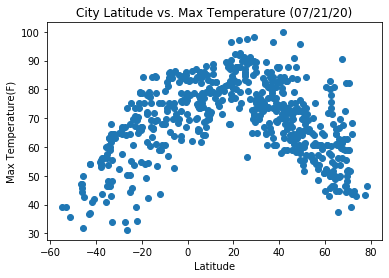

In [29]:
# Setup the x and y values and labels for the scatter plot and plot it
x_value = weather_df["Lat"]
y_value = weather_df["Max Temp"]

plt.xlabel('Latitude')
plt.ylabel('Max Temperature(F)')
plt.title("City Latitude vs. Max Temperature (07/21/20)")

plt.scatter(x_value, y_value)

#  Save an image of the chart and print to screen

plt.savefig("../output_data/Images/LatVsTemp.png") 
plt.show()

## Latitude vs. Humidity Plot

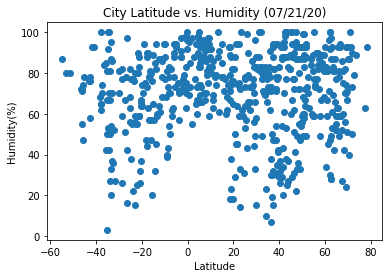

In [30]:
# Setup the x and y values and labels for the scatter plot and plot it

x_value = weather_df["Lat"]
y_value = weather_df["Humidity"]

plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title("City Latitude vs. Humidity (07/21/20)")

plt.scatter(x_value, y_value)

#  Save an image of the chart and print to screen

plt.savefig("../output_data/Images/LatVsHumidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

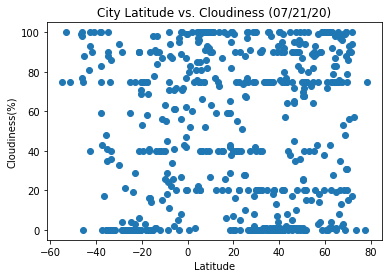

In [31]:
# Setup the x and y values and labels for the scatter plot and plot it
x_value = weather_df["Lat"]
y_value = weather_df["Cloudiness"]

plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title("City Latitude vs. Cloudiness (07/21/20)")

plt.scatter(x_value, y_value)
#  Save an image of the chart and print to screen

plt.savefig("../output_data/Images/LatVsCloud.png")
plt.show()

## Latitude vs. Wind Speed Plot

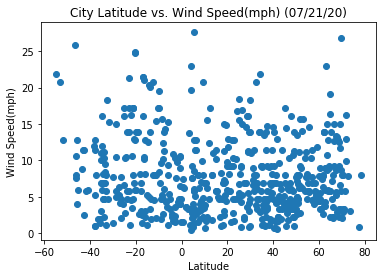

In [32]:
# Setup the x and y values and labels for the scatter plot and plot it
x_value = weather_df["Lat"]
y_value = weather_df["Wind Speed"]

plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title("City Latitude vs. Wind Speed(mph) (07/21/20)")

plt.scatter(x_value, y_value)

#  Save an image of the chart and print to screen

plt.savefig("../output_data/Images/LatVsWindSpeed.png") 
plt.show()

## Linear Regression

In [18]:
# OPTIONAL: Create a function to create Linear Regression plots
def lin_reg(x_val,y_val):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
    regress_values = x_val * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_val,y_val)
    plt.plot(x_val,regress_values,"r-")
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")
    print(f"The r-squared is: {rvalue**2}")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [19]:
# Create Northern Hemisphere DataFrame
northern_data_df = weather_df.loc[(weather_df["Lat"] >= 0)]
northern_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Develi,38.39,35.49,60.80,72,0,1.12,TR,1595562801
1,Ormara,25.21,64.64,85.26,78,88,15.59,PK,1595562801
3,Kautokeino,69.01,23.04,55.31,93,100,9.28,NO,1595562801
4,Negombo,7.21,79.84,77.00,88,75,8.05,LK,1595562801
7,Provideniya,64.38,-173.30,53.60,66,87,8.95,RU,1595562729
...,...,...,...,...,...,...,...,...,...
586,Abhayāpuri,26.33,90.67,79.38,90,100,5.23,IN,1595562865
588,Gijang,35.24,129.21,77.00,73,75,9.17,KR,1595562865
591,Jurm,36.86,70.83,79.74,19,0,4.34,AF,1595562865
592,Aklavik,68.22,-135.01,62.60,42,20,12.75,CA,1595562866


In [20]:
# Create Southern Hemisphere DataFrame
southern_data_df = weather_df.loc[(weather_df["Lat"] < 0)]
southern_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Avarua,-21.21,-159.78,73.40,88,6,4.70,CK,1595562712
5,Namatanai,-3.67,152.43,85.08,70,97,10.87,PG,1595562801
6,Rikitea,-23.12,-134.97,67.23,59,29,13.85,PF,1595562801
9,Ushuaia,-54.80,-68.30,39.20,87,75,21.92,AR,1595562739
11,Busselton,-33.65,115.33,63.00,54,36,9.48,AU,1595562802
...,...,...,...,...,...,...,...,...,...
582,São João dos Patos,-6.50,-43.70,69.87,63,26,3.60,BR,1595562865
585,Angoche,-16.23,39.91,69.35,80,14,10.20,MZ,1595562865
587,Mount Gambier,-37.83,140.77,55.40,62,100,12.75,AU,1595562865
589,Pangai,-19.80,-174.35,78.80,74,75,13.87,TO,1595562865


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.38349153707350836


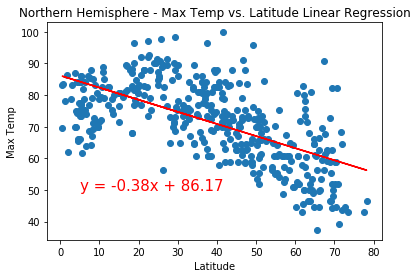

In [21]:
# Setup the axes, title, coordinates for the linear equation text, labels and call the fucntion to compute linear regression
x_val = northern_data_df["Lat"]
y_val = northern_data_df["Max Temp"]
a = 5
b = 50


title = "Northern Hemisphere - Max Temp vs. Latitude Linear Regression"
xlabel = "Latitude"
ylabel = "Max Temp"

# Call the function
lin_reg(x_val,y_val)

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.496944592831397


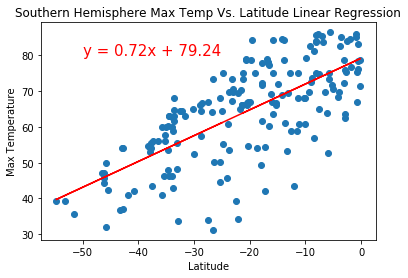

In [22]:
# Setup the axes, title, coordinates for the linear equation text, labels and call the fucntion to compute linear regression
x_val = southern_data_df["Lat"]
y_val = southern_data_df["Max Temp"]
a = -50
b = 80

title = "Southern Hemisphere Max Temp Vs. Latitude Linear Regression"
xlabel = "Latitude"
ylabel = "Max Temperature"

# Invoke function
lin_reg(x_val,y_val)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.010320013617779253


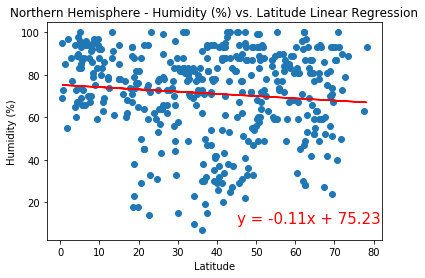

In [23]:
# Setup the axes, title, coordinates for the linear equation text, labels and call the fucntion to compute linear regression
x_val = northern_data_df["Lat"]
y_val = northern_data_df["Humidity"]
a = 45
b = 10
title = "Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression"
xlabel = 'Latitude'
ylabel = 'Humidity (%)'

# Invoke function
lin_reg(x_val,y_val)


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.026476510274759533


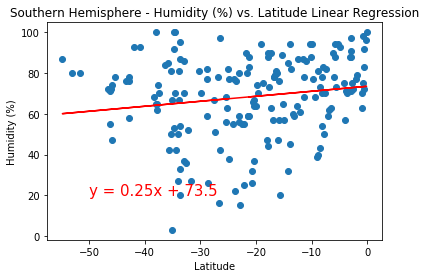

In [24]:
# Setup the axes, title, coordinates for the linear equation text, labels and call the fucntion to compute linear regression
x_val = southern_data_df["Lat"]
y_val = southern_data_df["Humidity"]
a = -50
b = 20
xlabel = 'Latitude'
ylabel = 'Humidity (%)'
title = "Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression"

# Call function
lin_reg(x_val,y_val)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.005324657616297572


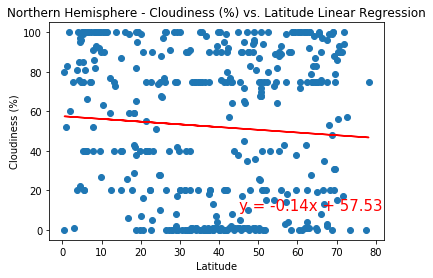

In [25]:
# Setup the axes, title, coordinates for the linear equation text, labels and call the fucntion to compute linear regression
x_val = northern_data_df["Lat"]
y_val = northern_data_df["Cloudiness"]
a = 45
b = 10
xlabel = 'Latitude'
ylabel = 'Cloudiness (%)'
title = "Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression"

# Call function
lin_reg(x_val,y_val)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.00010953646906832691


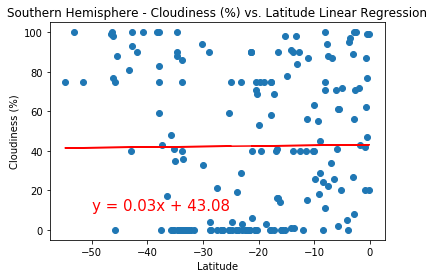

In [26]:
# Setup the axes, title, coordinates for the linear equation text, labels and call the fucntion to compute linear regression
x_val = southern_data_df["Lat"]
y_val = southern_data_df["Cloudiness"]
a = -50
b = 10
xlabel = 'Latitude'
ylabel = 'Cloudiness (%)'
title = "Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression"

# Call function
lin_reg(x_val,y_val)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.003404345687323781


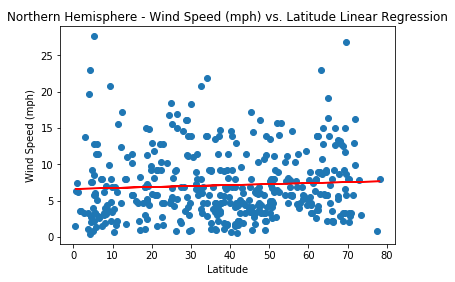

In [27]:
# Setup the axes, title, coordinates for the linear equation text, labels and call the fucntion to compute linear regression
x_val = northern_data_df["Lat"]
y_val = northern_data_df["Wind Speed"]
a = 30
b = 30
xlabel = 'Latitude'
ylabel = 'Wind Speed (mph)'
title = "Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression"

# Call function
lin_reg(x_val,y_val)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.014950640358513713


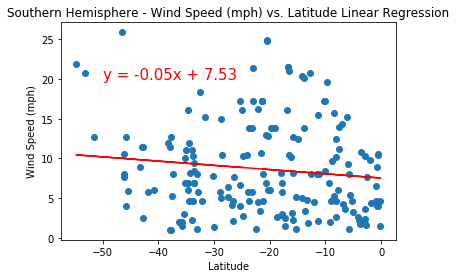

In [28]:
# Setup the axes, title, coordinates for the linear equation text, labels and call the fucntion to compute linear regression
x_val = southern_data_df["Lat"]
y_val = southern_data_df["Wind Speed"]
a = -50
b = 20
xlabel = 'Latitude'
ylabel = 'Wind Speed (mph)'
title = "Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression"

# Call function
lin_reg(x_val,y_val)